### How to earn effectively as a software developer?
Dataset:Stack Overflow Data-2019 Survey https://insights.stackoverflow.com/survey/2019  

Software developers has the image that doing lots of overtime work.  
However, there is some of them are having good income and also keeping there work-life balance good.
Naturally, I asked myself: Can I be one of them? Is it too late for me? What should I do for that?
With these question, I did a brief research with the 2019 Stack Overflow's annual Developer Survey.The survey includes nearly 90,000 developers answer.  

To avoid the group of people who earning money by getting lots of overtime pay, I will look at "hourly income" instead of "annual income" in this report. 
"hourly income" = "annual income" / "work hours". 

Define the peple who has good "hourly income" and satisfied with their career as "satisfied good earner". I will focous on "satisfied good earner" in this report.

For simplicity,I look at professional developers in the top 10 apearance of countries:'United States', 'India', 'United Kingdom', 'Germany', 'Canada', 'France', 'Brazil', 'Poland', 'Australia', 'Netherlands',
'Russian Federation'.  

I raised these 4 questions as below.  
1. What programming language is popular in the "satisfied good earner" group?
2. What kind of database is popular in the "satisfied good earner" group?
3. How old and how many years coding as professional developer are they in the "satisfied good earner" group?
4. What is the key factors in the "satisfied good earner" group?

P.S.
1. I chose below columns in survey for simplicity:  
'Employment', 'Country', 'EdLevel', 'OrgSize', 'DevType', 'YearsCodePro', 'MgrWant', 'JobSeek', 'LastHireDate', 'WorkPlan','CareerSat', 'WorkLoc', 'CodeRevHrs', 'LanguageWorkedWith', 'DatabaseWorkedWith', 'OpSys', 'Age', 'Gender', 'Dependents', 'EarningPerHours'.
2. Salary converted to annual USD salaries using the exchange rate on 2019-02-01, 


Read the survey csv file to dataframe 

In [198]:
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
from feature_selector import FeatureSelector
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head(1)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult


In [199]:
df.shape

(88883, 85)

Data wrangling

In [200]:
# A function to separate columns including multiple values which separated by ";"
def clean_separate_multivalues(col_list,df):
    df = df.dropna(subset=col_list, axis=0)
    new_df = df.copy()
    for column in col_list:
        new_df = new_df.set_index(new_df.columns.drop(column).to_list())
        new_df = new_df[column].str.split(';', expand=True)
        new_df = \
            (new_df.stack()
            .reset_index()
            .rename(columns={0:column})
            .loc[:, df.columns]
            )
    return new_df

In [201]:
#Only look at professional developers
df = df[df.MainBranch == 'I am a developer by profession']
#To avoid too much data, I only analysis the Top 10 countries here
countries = df.Country.value_counts(ascending = False)[:11]
df = df[df['Country'].isin(countries.index)]
#Remove duplicated data
df.drop_duplicates(keep = 'first', inplace = True)
df.duplicated().sum()

0

In [202]:
#Calculate compensation per hours, (The survay assuming 12 working months and 50 working weeks)
# Drop rows with missing income related values
df = df.dropna(subset = ['ConvertedComp','WorkWeekHrs'], axis = 0)
df['EarningPerHours'] = df['ConvertedComp']/(df['WorkWeekHrs']*50)
df = df.drop(['ConvertedComp','WorkWeekHrs'],axis =1)
#delete outliers, keep only the ones that are within +3 to -3 standard deviations
df = df[np.abs(df.EarningPerHours-df.EarningPerHours.mean()) <= (3*df.EarningPerHours.std())]

In [203]:
#Change years data type to "int"
df = df.replace('Less than 1 year',0)
df = df.replace('More than 50 years',50)
df['YearsCodePro'] = df['YearsCodePro'].fillna(0).astype(int)

In [204]:
#Take work-life balance good people only
df = df.query('CareerSat == "Very satisfied" or CareerSat == "Slightly satisfied"') 

In [239]:
df.shape

(25684, 84)

Prepare dataframes for each questions
1. What programming language is popular in the "satisfied good earner" group?
2. What kind of database is popular in the "satisfied good earner" group?
3. How old and how many years coding as professional developer are they in the "satisfied good earner" group?
4. What is the key factors in the "satisfied good earner" group?

In [240]:
# for Q1,Q2:
col_dev_lang_db =  ['DevType','LanguageWorkedWith', 'DatabaseWorkedWith', 'EarningPerHours']
df_dev_lang_db = df[col_dev_lang_db].copy()
#df_dev_lang_db.drop_duplicates(keep = 'first', inplace = True)

# for Q3: 
col_age = ['YearsCodePro', 'Age', 'EarningPerHours']
df_age = df[col_age].copy()
#df_age.drop_duplicates(keep = 'first', inplace = True)

# for Q4:
col_related = ['Employment','Country', 'EdLevel', 'OrgSize',
                     'DevType', 'YearsCodePro', 
                   'MgrWant', 'JobSeek', 'LastHireDate','WorkPlan','CareerSat',
        'WorkLoc', 'CodeRevHrs','LanguageWorkedWith', 'DatabaseWorkedWith', 'OpSys', 
                   'Age', 'Gender','Dependents','EarningPerHours']

df_related = df[col_related].copy()
df_related.drop_duplicates(keep = 'first', inplace = True)

In [241]:
df_related.shape

(25682, 20)

### Question 1.  What programming language is popular in the "satisfied good earner" group?

In [242]:
df_dev_lang_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25684 entries, 3 to 88325
Data columns (total 4 columns):
DevType               25512 non-null object
LanguageWorkedWith    25621 non-null object
DatabaseWorkedWith    23028 non-null object
EarningPerHours       25684 non-null float64
dtypes: float64(1), object(3)
memory usage: 1003.3+ KB


Text(0, 0.5, 'Number Of People')

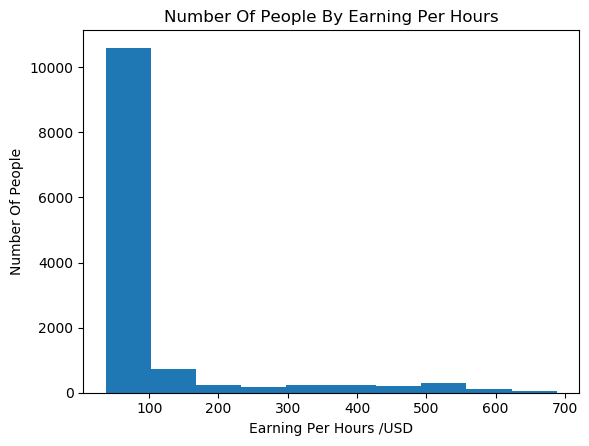

In [248]:
df_dev_lang_db.EarningPerHours.plot(kind = 'hist')
plt.title("Number Of People By Earning Per Hours")
plt.xlabel("Earning Per Hours /USD")
plt.ylabel("Number Of People")

We can see most of developers get lest than 100 USD per hour.This is reasonable.  
Abstract a group of people have good "Earning Per Hours" larger than medium value.  


In [245]:
df_dev_lang_db = df_dev_lang_db.query('EarningPerHours>{}'.format(np.percentile(df_dev_lang_db['EarningPerHours'],50)))
df_dev_lang_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12842 entries, 12 to 88325
Data columns (total 4 columns):
DevType               12746 non-null object
LanguageWorkedWith    12816 non-null object
DatabaseWorkedWith    11427 non-null object
EarningPerHours       12842 non-null float64
dtypes: float64(1), object(3)
memory usage: 501.6+ KB


Calculate average Earning Per Hours of each Developer type and Language type.

In [230]:
df_dev_lang_db = clean_separate_multivalues(['DevType','LanguageWorkedWith', 'DatabaseWorkedWith'],df_dev_lang_db)
df_dev_lang = df_dev_lang_db.groupby(['DevType','LanguageWorkedWith']).mean();
df_dev_lang = df_dev_lang.reset_index()
df_dev_lang.head(1)

,DevType,LanguageWorkedWith,EarningPerHours
0,Academic researcher,Assembly,132.294242


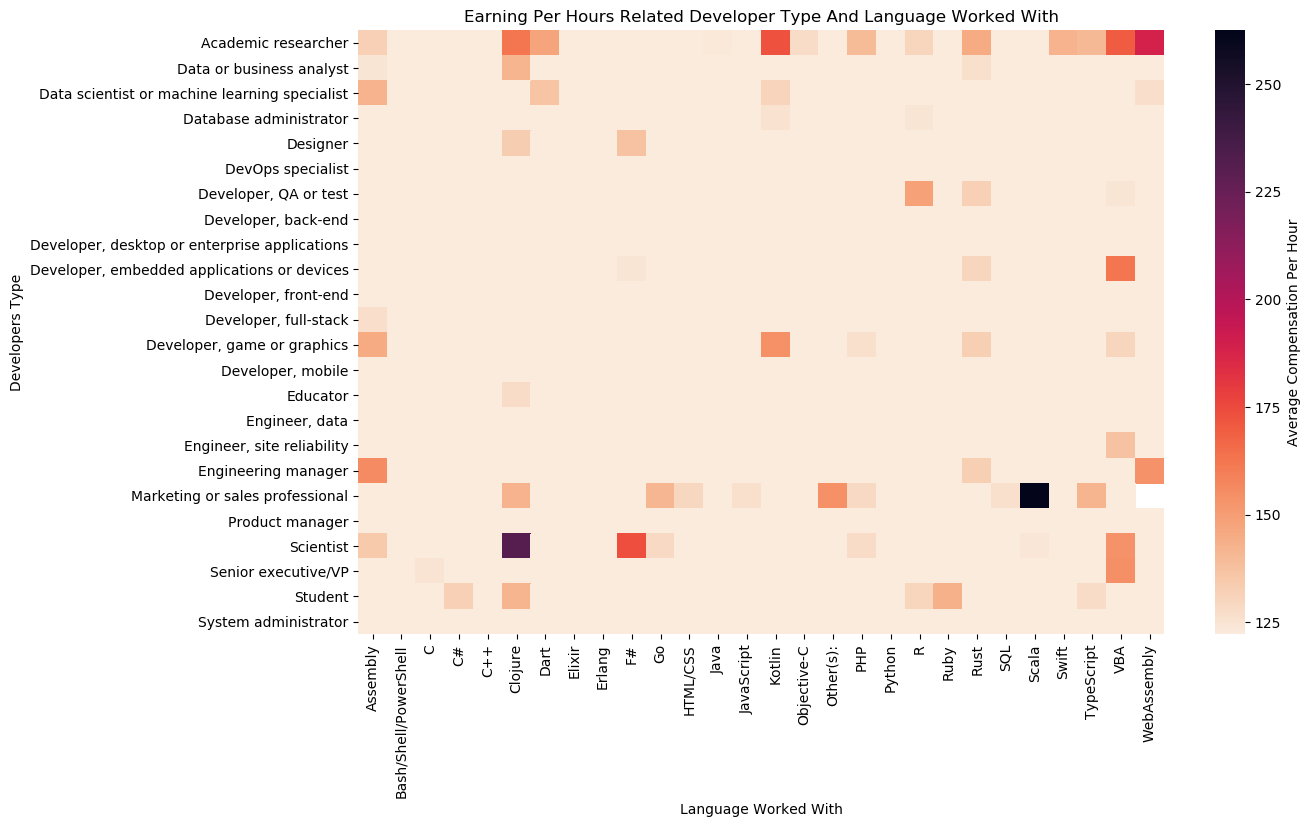

In [249]:
df_dev_lang_pivot = df_dev_lang.pivot(index = 'DevType',
                               columns = 'LanguageWorkedWith',
                               values = 'EarningPerHours')
#set a threshold to show the heat map clearly.
vmin_cut = np.percentile(df_dev_lang['EarningPerHours'],90)
plt.figure(figsize=(13, 8)) 
plt.title('Earning Per Hours Related Developer Type And Language Worked With')
ax = sns.heatmap(df_dev_lang_pivot,cmap = 'rocket_r',vmin = vmin_cut ,cbar = True )
ax.collections[0].colorbar.set_label("Average Compensation Per Hour")
plt.xlabel('Language Worked With')
plt.ylabel('Developers Type')
plt.show()

As we can see from above,the group of  good "Earning Per Hours" developer type are "Academic researcher", "Marketing or sales professional","Scientist". Moreover,the group of good "Earning Per Hours" using languages are "Assembly","Clojure","VBA".  
The outstanding group of good "Earning Per Hours"  is "Marketing or sales professional" who use the language "Scala".


### Question2.What kind of database is popular in the "satisfied good earner" group?

In [232]:
df_dev_db = df_dev_lang_db.groupby(['DevType','DatabaseWorkedWith']).mean();
df_dev_db = df_dev_db.reset_index()
df_dev_db.head(1)

,DevType,DatabaseWorkedWith,EarningPerHours
0,Academic researcher,Cassandra,155.61433


To see what group of people have good "Earning Per Hours"

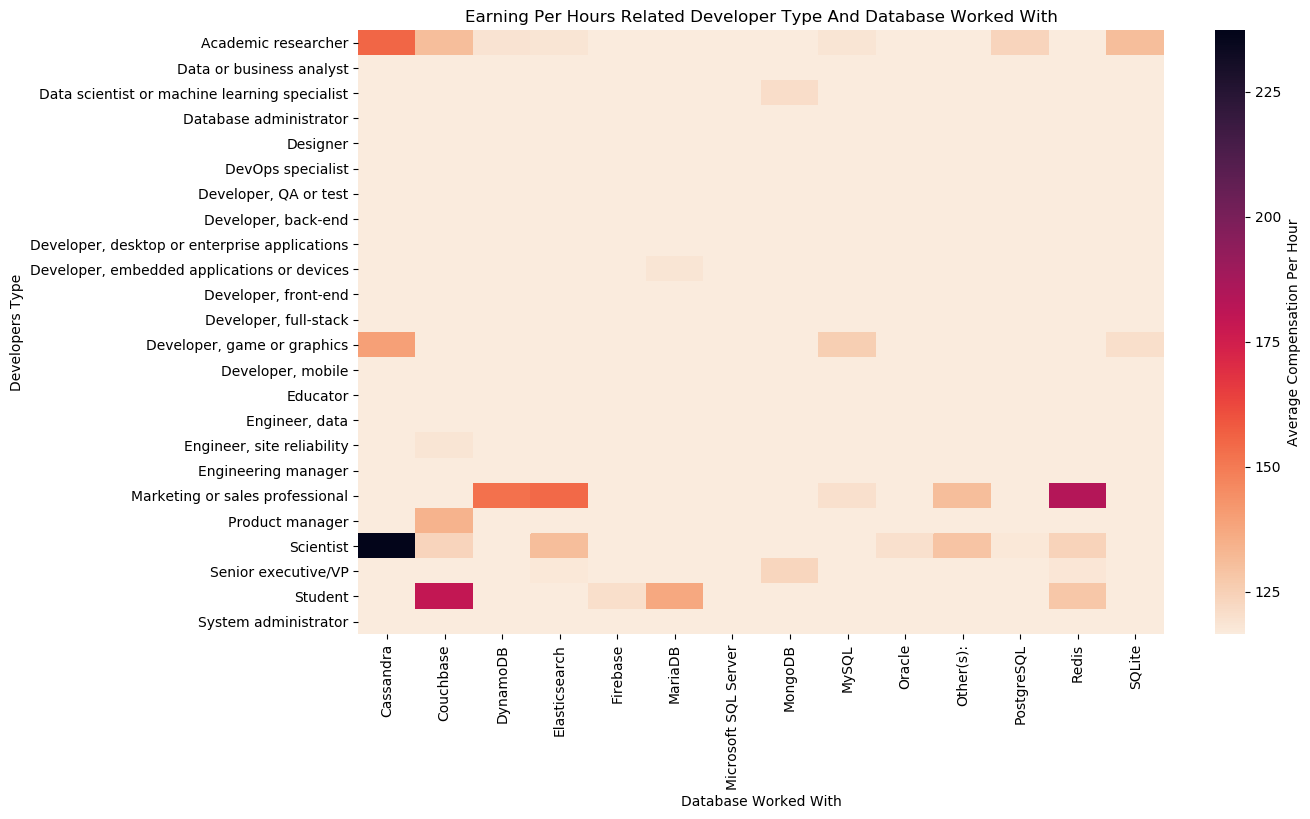

In [250]:
df_dev_db_pivot = df_dev_db.pivot(index = 'DevType',
                               columns = 'DatabaseWorkedWith',
                               values = 'EarningPerHours')
#set a threshold to show the heat map clear.
vmin_cut = np.percentile(df_dev_db['EarningPerHours'],90)
plt.figure(figsize=(13, 8)) 
plt.title('Earning Per Hours Related Developer Type And Database Worked With')
ax = sns.heatmap(df_dev_db_pivot,cmap = 'rocket_r',vmin = vmin_cut,cbar = True )
ax.collections[0].colorbar.set_label("Average Compensation Per Hour")
plt.xlabel('Database Worked With')
plt.ylabel('Developers Type')
plt.show()

As we can see from above,the group of good "Earning Per Hours" developer type are "Academic researcher", "Marketing or sales professional","Scientist","Student". Moreover, the group of good "Earning Per Hours" using languages are "Cassandra","Couchbase","Redis".  
the outstanding group of good "Earning Per Hours" is "Scientist" who use the database "Cassandra".

### Question3. How old and how many years coding as professional developer are they in the "satisfied good earner" group?

In [252]:
df_age = df_age.query('EarningPerHours>{}'.format(np.percentile(df_age['EarningPerHours'],50)))

In [253]:
df_age = df_age.groupby(['YearsCodePro','Age']).mean();
df_age = df_age.reset_index()
df_age.head(5)

,YearsCodePro,Age,EarningPerHours
0,0,16.0,38.166667
1,0,18.0,60.000000
2,0,19.0,285.555556
3,0,20.0,171.579692
4,0,21.0,115.856571


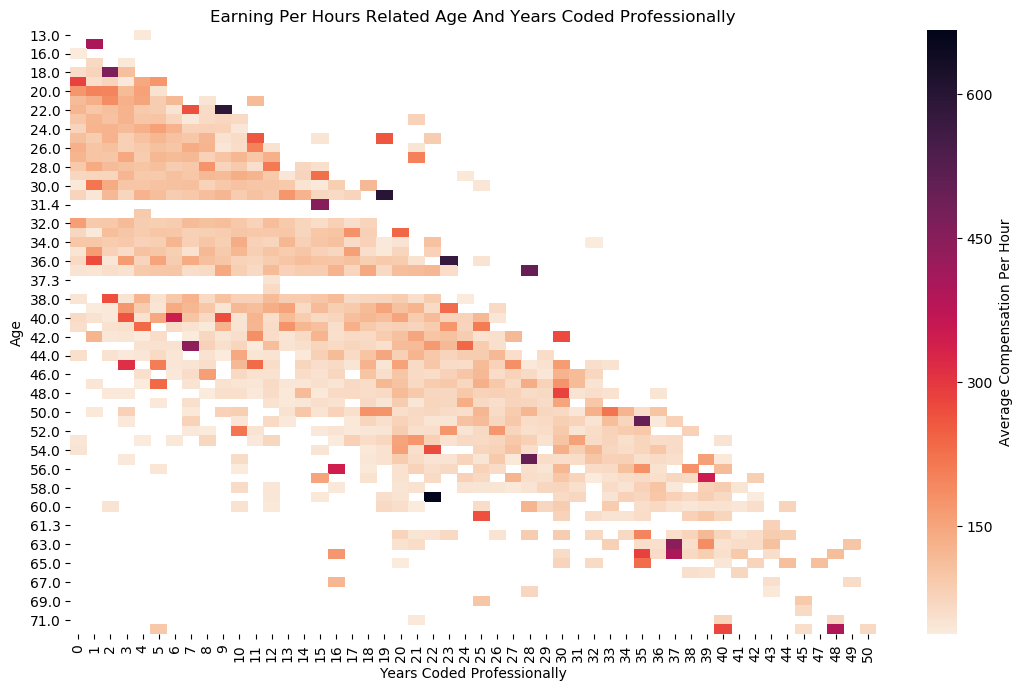

In [254]:
df_age_pivot = df_age.pivot(index = 'Age',
                      columns = 'YearsCodePro',
                      values = 'EarningPerHours'
                     )
plt.figure(figsize=(13, 8))
ax = sns.heatmap(df_age_pivot,cmap = 'rocket_r',cbar = True )
plt.title('Earning Per Hours Related Age And Years Coded Professionally')
plt.xlabel('Years Coded Professionally')
ax.collections[0].colorbar.set_label("Average Compensation Per Hour")
#plt.savefig('data/dst/seaborn_heatmap_big.png')
plt.show()

As we can see above, there is a slightly dark line in the outside of the cloud. This means in the same age, with longer code profession experience earn better.
Also, In the same years coded professionally, the youngest group and the oldest group earn better. 
The group of people the age around 38-48 earning good generrally.
Many of begginers who has code as profession less than 5 years are in the data, they are from age 13-60.
I was supprised that 18 years old young people are earning good with less than 5 years experience of code as profession. Also, people who over than 70 years old are still working as a developer.


### Question4. What is the key factors in the "satisfied good earner" group?

In [257]:
df_related.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25682 entries, 3 to 88325
Data columns (total 20 columns):
Employment            25650 non-null object
Country               25682 non-null object
EdLevel               25334 non-null object
OrgSize               25306 non-null object
DevType               25510 non-null object
YearsCodePro          25682 non-null int32
MgrWant               22236 non-null object
JobSeek               25682 non-null object
LastHireDate          25671 non-null object
WorkPlan              25224 non-null object
CareerSat             25682 non-null object
WorkLoc               25547 non-null object
CodeRevHrs            20565 non-null float64
LanguageWorkedWith    25619 non-null object
DatabaseWorkedWith    23026 non-null object
OpSys                 25553 non-null object
Age                   24751 non-null float64
Gender                25258 non-null object
Dependents            25141 non-null object
EarningPerHours       25682 non-null float64
dtypes: f

There is some numeric missing data need to handle.   
Because I have enough data to analysis,I choose to drop these null data instead of fill it.

In [258]:
num_vars = df_related.select_dtypes(include=['float', 'int']).columns
for col in num_vars:

    df_related.dropna(subset = [col], inplace=True)

In [259]:
# Separate columns including multiple values which separated by ";"
col_list = ['DevType','LanguageWorkedWith', 'DatabaseWorkedWith']
new_df = clean_separate_multivalues(col_list,df_related)
new_df.shape

(1109001, 20)

In [261]:
# check if there is any ';'' remain and need to remove
cat_columns = new_df.select_dtypes(include=['object']).copy().columns
for column in cat_columns:
    if new_df[column].str.contains(";").sum():
        print(column)

WorkPlan
Gender


A way to decide which factors are important to "satisfied good earner", I use a library called [feature_selector](https://github.com/WillKoehrsen/feature-selector), which behind the scene utilizing a gradient boosting machine implemented in the [LightGBM library](https://lightgbm.readthedocs.io/en/latest/Quick-Start.html).
A blog post on how to use this package can be found [here](https://towardsdatascience.com/a-feature-selection-tool-for-machine-learning-in-python-b64dd23710f0).

This module relies on a machine learning model to identify features to remove. It therefore requires a supervised learning problem with labels. 

Categorize 'EarningPerHours' column to 2 values: one is earning over than medium value,another is lower than medium value.

In [262]:
bins = [-0.5,np.percentile(new_df['EarningPerHours'],50),np.max(new_df['EarningPerHours'])]
labels=['Cat{}'.format(x) for x in range(1, len(bins))]
y = pd.cut(new_df['EarningPerHours'], bins=bins, labels=labels)


In [263]:
#Check whether there is anything lost.
y.isna().sum()

0

In [264]:
X = new_df.drop(['EarningPerHours'],axis = 1)
fs = FeatureSelector(data = X, labels = y)

In [265]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.992946	valid_0's binary_logloss: 0.148994
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.992753	valid_0's binary_logloss: 0.150413
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.993345	valid_0's binary_logloss: 0.146924
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.992321	valid_0's binary_logloss: 0.151867
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.993017	valid_0's binary_logloss: 0.149181
Training until validation scores don't improve for 100 rounds
Did not meet early stopp

In [266]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features[10:15]
fs.feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,Age,4022.3,0.134077,0.134077
1,YearsCodePro,3846.0,0.128200,0.262277
2,CodeRevHrs,2864.3,0.095477,0.357753
3,CareerSat_Slightly satisfied,612.8,0.020427,0.378180
4,OpSys_Windows,555.2,0.018507,0.396687
5,Country_United States,522.7,0.017423,0.414110
6,"EdLevel_Bachelor’s degree (BA, BS, B.Eng., etc.)",503.7,0.016790,0.430900
7,WorkPlan_There is a schedule and/or spec (made...,474.2,0.015807,0.446707
8,LastHireDate_Less than a year ago,463.4,0.015447,0.462153
9,MgrWant_No,458.0,0.015267,0.477420


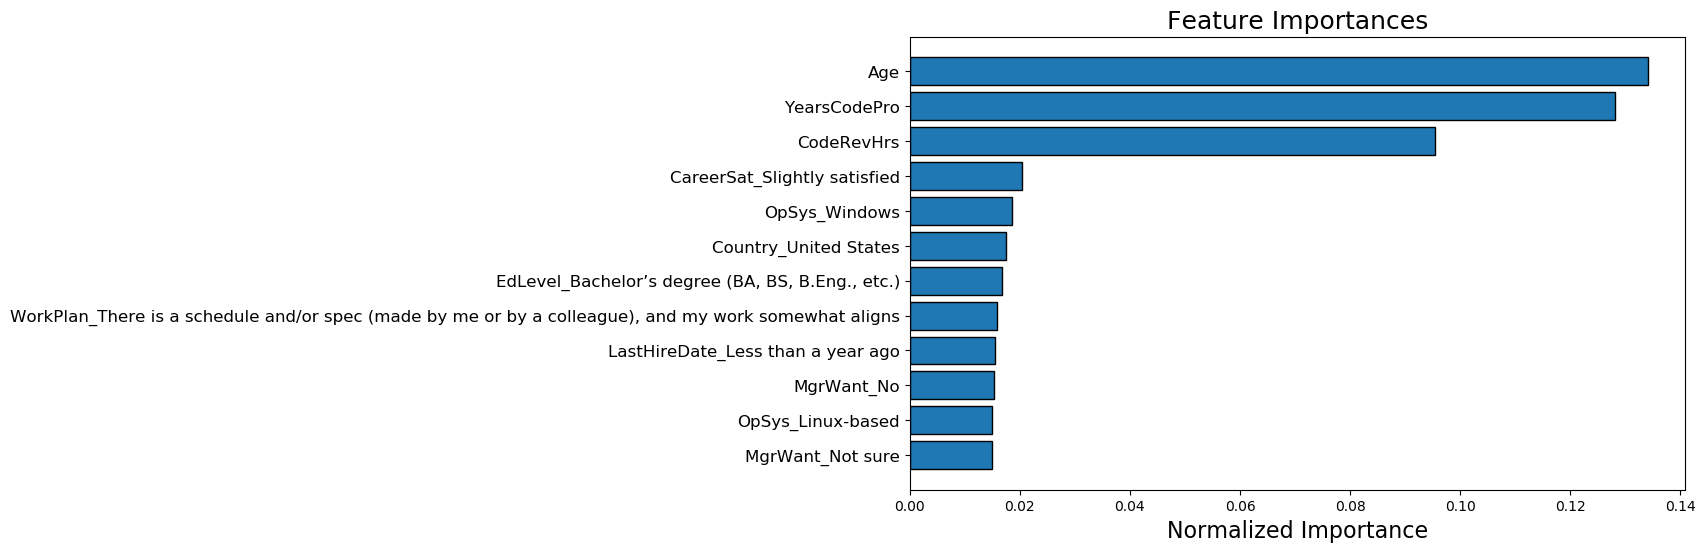

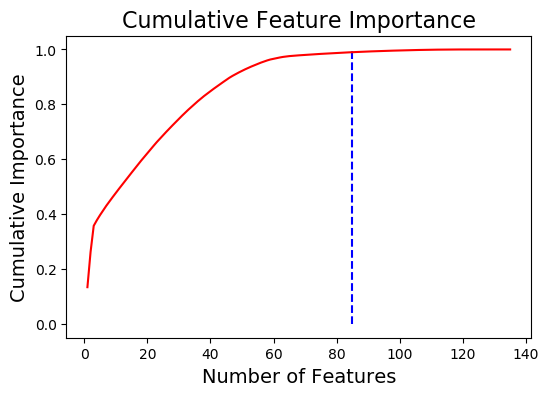

85 features required for 0.99 of cumulative importance


In [267]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

The result shows that "Age" and "Years code as profession" is very important to get a good hourly income.  
The code review hours occupy the third places, indicating that longer time with code review are related to more hourly income. Then from the fourth factors like "slightly satisfied in career", "using windows system","live in united states" might have subtle influences on hourly income, but not very strong.  

**Conclusion:**  
 + I can simply say, If one person in around age 38-48 who taking lots of time to review code,and codde as profession many years, he/she has big chance to have good hourly income and work-life balance.  
 + In the same age, with longer code profession experience earn better. Also, In the same years coded professionally, the youngest group and the oldest group earn better. The group of people the age around 38-48 earning good generally.  
 + The group of good "Earning Per Hours" developer type are "Academic researcher", "Marketing or sales professional","Scientist","Student". Moreover, the group of good "Earning Per Hours" using languages are "Cassandra","Couchbase","Redis".The outstanding group of good "Earning Per Hours" is "Scientist" who use the database "Cassandra".  
 + The group of good "Earning Per Hours" developer type are "Academic researcher", "Marketing or sales professional","Scientist". Moreover,the group of good "Earning Per Hours" using languages are "Assembly","Clojure","VBA".The outstanding group of good "Earning Per Hours" is "Marketing or sales professional" who use the language "Scala".